## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from nltk.corpus import stopwords

pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 500

In [2]:
bigdf = pd.read_csv('../data/modelreadydata.csv')

In [3]:
bigdf.head(3)

,subreddit,body,lemmatized,stemmed,stardew_keywords,elden_keywords,type
0,0,It is almost time my fellow hollows,It is almost time my fellow hollow,it is almost time my fellow hollow,0,0,Posts
1,0,24 Hours yet remain,24 Hours yet remain,24 hour yet remain,0,0,Posts
2,0,Your worst nightmares,Your worst nightmare,your worst nightmar,0,0,Posts


### Baseline

In [4]:
bigdf['subreddit'].value_counts(normalize=True)

1    0.501004
0    0.498996
Name: subreddit, dtype: float64

### Preprocessing

In [5]:
X = bigdf['body']
y = bigdf['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [6]:
#set up stopwords and count vectorize

stopwordsdf = pd.read_csv('../data/stopwords.csv')

custom_stopwords = list(stopwordsdf['words'])

stop_words = text.ENGLISH_STOP_WORDS.union(custom_stopwords)

cvec = CountVectorizer(stop_words=stop_words)

X_train_vectorized = cvec.fit_transform(X_train)
X_test_vectorized = cvec.transform(X_test)

X_traindf = pd.DataFrame(X_train_vectorized.todense(), columns=cvec.get_feature_names())
X_testdf = pd.DataFrame(X_test_vectorized.todense(), columns=cvec.get_feature_names())

In [7]:
X_traindf.describe()

,000,0000,009,01,0100,0165,02,02875,06,0641,...,zoomzoom,zuckerberg,zullie,zullies,zuzu,zweiboy,zweihander,äny,ಠ_ಠ,𝘴𝘭𝘰𝘷𝘤𝘩𝘺
count,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,...,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000
mean,0.000223,0.000223,0.000223,0.000446,0.000446,0.000223,0.000669,0.000223,0.000223,0.000223,...,0.000223,0.000223,0.000223,0.000223,0.000446,0.000223,0.000223,0.000223,0.000223,0.000223
std,0.014937,0.014937,0.014937,0.029874,0.021122,0.014937,0.025866,0.014937,0.014937,0.014937,...,0.014937,0.014937,0.014937,0.014937,0.021122,0.014937,0.014937,0.014937,0.014937,0.014937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modeling: Logistic Regression
- High predictive power, but overfit
- Keyword columns didn't boost the predictive score so decided to drop. Makes sense since keyword columns produce the same information as count vectorized data
- To combat overfitting, grid searched for hyperparameters and decided to do more EDA on potential words to bring into stopword list

In [8]:
lr = LogisticRegression()

In [9]:
lr.fit(X_traindf, y_train)

LogisticRegression()

In [10]:
print(f'Default Logistic Regression scores: {lr.score(X_traindf, y_train)}, {lr.score(X_testdf, y_test)}')

Default Logistic Regression scores: 0.9439982150825524, 0.8105756358768407


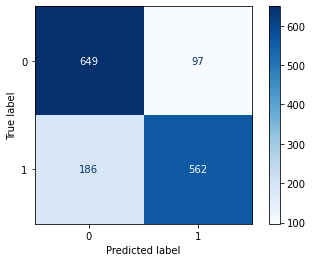

In [11]:
lr_preds = lr.predict(X_testdf)
tn, fp, fn, tp = confusion_matrix(y_test, lr_preds).ravel()
plot_confusion_matrix(lr, X_testdf, y_test, cmap='Blues')

In [12]:
lr3 = LogisticRegression()

lr3_params = {'C' : [0.1, 0.01, 1],
             'max_iter' : [1000, 2500, 5000]}

gridlr3 = GridSearchCV(lr3, lr3_params, cv=3, verbose=1)

In [13]:
gridlr3.fit(X_traindf, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.01, 1], 'max_iter': [1000, 2500, 5000]},
             verbose=1)

In [14]:
print(f'Best score: {gridlr3.best_score_ }')
print(f'Best params: {gridlr3.best_params_}')
print(f'Best Logistic Regression score: {gridlr3.score(X_traindf, y_train)}, {gridlr3.score(X_testdf, y_test)}')

Best score: 0.7991967871485942
Best params: {'C': 0.1, 'max_iter': 1000}
Best Logistic Regression score: 0.9185631414547077, 0.821954484605087


### Modeling: KNN

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X_traindf, y_train)

KNeighborsClassifier()

In [17]:
print(f'Default KNN scores: {knn.score(X_traindf, y_train)}, {knn.score(X_testdf, y_test)}')

Default KNN scores: 0.7704149933065596, 0.6251673360107095


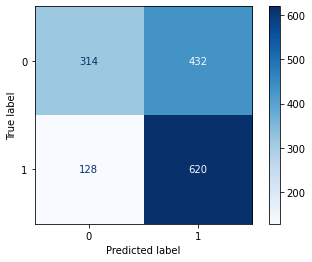

In [18]:
knn_preds = knn.predict(X_testdf)
tn, fp, fn, tp = confusion_matrix(y_test, knn_preds).ravel()
plot_confusion_matrix(knn, X_testdf, y_test, cmap='Blues')

In [19]:
#generate gridsearch and params to see if we can boost predictive power and combat overfitting
knn2 = KNeighborsClassifier()

knn_params = {'n_neighbors' : [15, 25, 30, 40],
             'weights' : ['uniform', 'distance'],
             'p' : [1,2]}

knngrid = GridSearchCV(knn2, knn_params, cv=3)

In [20]:
knngrid.fit(X_traindf, y_train)

print(f'Best score: {knngrid.best_score_ }')
print(f'Best params: {knngrid.best_params_}')
print(f'Best KNN score: {knngrid.score(X_traindf, y_train)}, {knngrid.score(X_testdf, y_test)}')

Best score: 0.6015171798304328
Best params: {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Best KNN score: 0.9576082106202588, 0.5943775100401606


### Modeling: Multinomial NB

In [21]:
mnb = MultinomialNB()

In [22]:
mnb.fit(X_traindf, y_train)

MultinomialNB()

In [23]:
print(f'Default MNB scores: {mnb.score(X_traindf, y_train)}, {mnb.score(X_testdf, y_test)}')

Default MNB scores: 0.9183400267737617, 0.8145917001338688


In [24]:
mnb2 = MultinomialNB()

mnb_params = {
    'alpha' : [0.25, 0.5, 0.75, 1]
}

mnbgrid = GridSearchCV(mnb2, mnb_params, cv=3)

In [25]:
mnbgrid.fit(X_traindf, y_train)

print(f'Best score: {mnbgrid.best_score_ }')
print(f'Best params: {mnbgrid.best_params_}')
print(f'Best MNB score: {mnbgrid.score(X_traindf, y_train)}, {mnbgrid.score(X_testdf, y_test)}')

Best score: 0.8130298973672468
Best params: {'alpha': 0.5}
Best MNB score: 0.9232485497545738, 0.8139223560910308


### Modeling: Random Forest Classifier

In [26]:
rfc = RandomForestClassifier()

In [27]:
rfc.fit(X_traindf, y_train)

RandomForestClassifier()

In [28]:
print(f'Default RFC scores: {rfc.score(X_traindf, y_train)}, {rfc.score(X_testdf, y_test)}')

Default RFC scores: 0.9576082106202588, 0.7710843373493976


In [29]:
rfc2 = RandomForestClassifier()

rfc_params = {
    'n_estimators' : [300, 600, 900],
    'max_depth' : [None, 1, 3, 5]
}

rfcgrid = GridSearchCV(rfc2, rfc_params, cv=3)

In [30]:
rfcgrid.fit(X_traindf, y_train)

print(f'Best score: {rfcgrid.best_score_ }')
print(f'Best params: {rfcgrid.best_params_}')
print(f'Best RFC score: {rfcgrid.score(X_traindf, y_train)}, {rfcgrid.score(X_testdf, y_test)}')

Best score: 0.7605979473449352
Best params: {'max_depth': None, 'n_estimators': 600}
Best RFC score: 0.9576082106202588, 0.7764390896921017


### Modeling: Extra Trees Classifier

In [31]:
etc = ExtraTreesClassifier()

In [32]:
etc.fit(X_traindf, y_train)

ExtraTreesClassifier()

In [33]:
print(f'Default ETC scores: {etc.score(X_traindf, y_train)}, {etc.score(X_testdf, y_test)}')

Default ETC scores: 0.9576082106202588, 0.7737617135207496


In [34]:
etc2 = ExtraTreesClassifier()

etc_params = {
    'n_estimators' : [150, 200, 300],
    'max_depth' : [None, 1, 2]
}

etcgrid = GridSearchCV(etc2, etc_params, cv=3)

In [35]:
etcgrid.fit(X_traindf, y_train)

print(f'Best score: {etcgrid.best_score_ }')
print(f'Best params: {etcgrid.best_params_}')
print(f'Best ETC score: {etcgrid.score(X_traindf, y_train)}, {etcgrid.score(X_testdf, y_test)}')

Best score: 0.7550200803212851
Best params: {'max_depth': None, 'n_estimators': 150}
Best ETC score: 0.9576082106202588, 0.7757697456492637


### Results

In [37]:
results_data = {
    'Model' : ['Baseline',
               'Logistic Regression',
              'KNN Classifier',
              'Multinomial Naive Bayes',
              'Random Forest Classifier',
              'Extra Trees Classifier'],
    
    'Default Train Score' : ['51.0',
                             round((lr.score(X_traindf, y_train)*100),0),
                             round((knn.score(X_traindf, y_train)*100),0),
                             round((mnb.score(X_traindf, y_train)*100), 0),
                             round((rfc.score(X_traindf, y_train)*100), 0),
                             round((etc.score(X_traindf, y_train)*100),0)],
    
    'Default Test Score' : ['51.0',
                            round((lr.score(X_testdf, y_test)*100),0),
                           round((knn.score(X_testdf, y_test)*100),0),
                           round((mnb.score(X_testdf, y_test)*100),0),
                           round((rfc.score(X_testdf, y_test)*100),0),
                           round((etc.score(X_testdf, y_test)*100),0)],
    
    'Best Train Score': ['51.0',
                                round((gridlr3.score(X_traindf, y_train)*100),0),
                                 round((knngrid.score(X_traindf, y_train)*100),0),
                                 round((mnbgrid.score(X_traindf, y_train)*100),0),
                                 round((rfcgrid.score(X_traindf, y_train)*100),0),
                                 round((etcgrid.score(X_traindf, y_train)*100),0)],
    
    
    'Best Test Score': ['51.0',
                                 round((gridlr3.score(X_testdf, y_test)*100),0),
                                 round((knngrid.score(X_testdf, y_test)*100),0),
                                 round((mnbgrid.score(X_testdf, y_test)*100),0),
                                 round((rfcgrid.score(X_testdf, y_test)*100),0),
                                 round((etcgrid.score(X_testdf, y_test)*100),0)],
    
    'Best Parameters': ['N/A',
                        gridlr3.best_params_,
                       knngrid.best_params_,
                       mnbgrid.best_params_,
                       rfcgrid.best_params_,
                       etcgrid.best_params_]
    
}

In [38]:
final_results = pd.DataFrame(data=results_data)
final_results['Variance for Default'] = pd.to_numeric(final_results['Default Train Score']) - pd.to_numeric(final_results['Default Test Score'])
final_results['Variance for Best'] = pd.to_numeric(final_results['Best Train Score']) - pd.to_numeric(final_results['Best Test Score'])
final_results.head(7)

,Model,Default Train Score,Default Test Score,Best Train Score,Best Test Score,Best Parameters,Variance for Default,Variance for Best
0,Baseline,51.0,51.0,51.0,51.0,N/A,0.0,0.0
1,Logistic Regression,94.0,81.0,92.0,82.0,"{'C': 0.1, 'max_iter': 1000}",13.0,10.0
2,KNN Classifier,77.0,63.0,96.0,59.0,"{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}",14.0,37.0
3,Multinomial Naive Bayes,92.0,81.0,92.0,81.0,{'alpha': 0.5},11.0,11.0
4,Random Forest Classifier,96.0,77.0,96.0,78.0,"{'max_depth': None, 'n_estimators': 600}",19.0,18.0
5,Extra Trees Classifier,96.0,77.0,96.0,78.0,"{'max_depth': None, 'n_estimators': 150}",19.0,18.0


In [39]:
final_results.to_csv('../data/finalresults_cvec_ogtext4.csv')